<a href="https://colab.research.google.com/github/fionnwhelan/Aorta_Segmentation/blob/main/CT_Segmentation_Greyscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob
import tensorflow as tf

In [ ]:
SIZE = 256
num_images = 131

In [ ]:
image_names = glob.glob('/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/*.jpg')

In [ ]:
image_names.sort()

In [ ]:
print(image_names)

['/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-001.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-002.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-003.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-004.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-005.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-006.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-007.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-008.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-009.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-010.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-011.jpg', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-0

In [ ]:
image_names_subset = image_names[0:num_images]

In [ ]:
print(image_names_subset[-1])

/content/drive/MyDrive/Final_Year_Project/Converted_Files/images/image01-131.jpg


In [ ]:
images = [cv2.imread(img, 0) for img in image_names_subset]

In [ ]:
print(type(images))

<class 'list'>


In [ ]:
images = []
i = 0
for img in image_names_subset:
  image = cv2.imread(img, 0)
  image = tf.expand_dims(image, 2)
  image = tf.image.resize(image, (128, 128))
  images.append(image)
  i += 1


In [ ]:
image_dataset = np.array(images)
# input_image = tf.image.resize(datapoint['image'], (128, 128))
# image_dataset = tf.image.resize(image_dataset, (256, 256))
#image_dataset = np.expand_dims(image_dataset, axis = 3)
print(image_dataset.shape)

(131, 128, 128, 1)


In [ ]:
mask_names = glob.glob('/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/*.png')

In [ ]:
# mask_names.sort(reverse=True)

In [ ]:
mask_names_subset = mask_names[0:num_images]

In [ ]:
print(mask_names_subset)

['/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-001.png', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-002.png', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-003.png', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-004.png', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-005.png', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-006.png', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-007.png', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-008.png', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-009.png', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-010.png', '/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-011.png', '/content/drive/MyDr

In [ ]:
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]


In [ ]:
masks = []
i = 0
for mask in mask_names_subset:
  mask = cv2.imread(mask, 0)
  mask = tf.expand_dims(mask, 2)
  mask = tf.image.resize(mask, (128, 128))
  masks.append(mask)
  i += 1

In [ ]:
# to ensure mask ordering is 'flipped' to match image ordering
masks = masks[::-1]

In [ ]:
print(mask_names_subset[-1])

/content/drive/MyDrive/Final_Year_Project/Converted_Files/annotations/image01-131.png


In [ ]:
mask_dataset = np.array(masks)
# mask_dataset = mask_dataset[::-1]
# print(mask_dataset.shape())

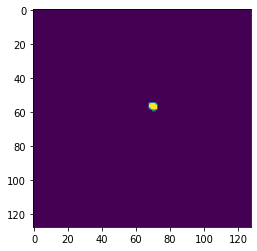

In [ ]:
plt.imshow(mask_dataset[0])
plt.show()

In [ ]:
# mask_dataset = np.expand_dims(mask_dataset, axis = 3)

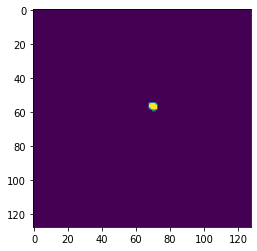

In [ ]:
plt.imshow(mask_dataset[0])
plt.show()

In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (131, 128, 128, 1)
Mask data shape is:  (131, 128, 128, 1)
Max pixel value in image is:  221.25
Labels in the mask are :  [ 30.    76.25 122.5  168.75 215.  ]


In [ ]:
image_dataset = image_dataset/255.
mask_dataset = mask_dataset/255.

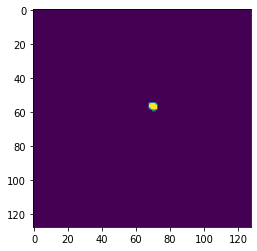

In [ ]:
plt.imshow(mask_dataset[0])
plt.show()

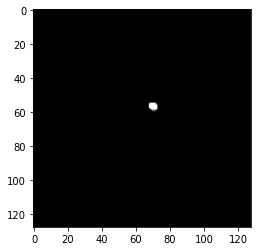

In [ ]:
plt.imshow(mask_dataset[0,:,:,0], cmap='gray')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, shuffle=True)

In [ ]:
import random

"\nimage_number = 103# random.randint(0, len(X_train)-1)\nplt.figure(figsize=(20,10))\nplt.subplot(143)\nplt.imshow(X_train[image_number,:,:,0], cmap='gray')\nplt.grid()\nplt.subplot(144)\nplt.imshow(y_train[image_number,:,:,0], cmap='gray')\nplt.grid()\nplt.show\n"

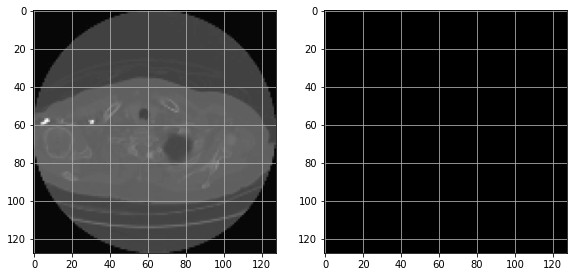

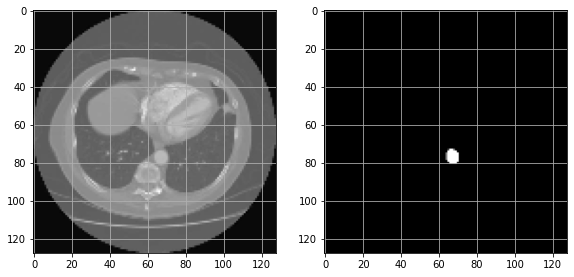

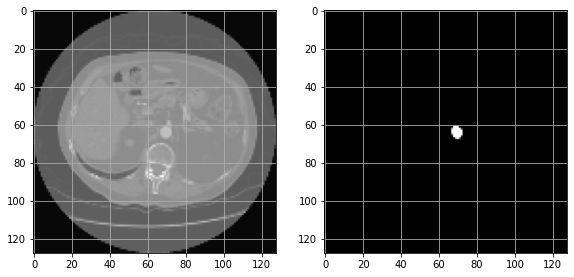

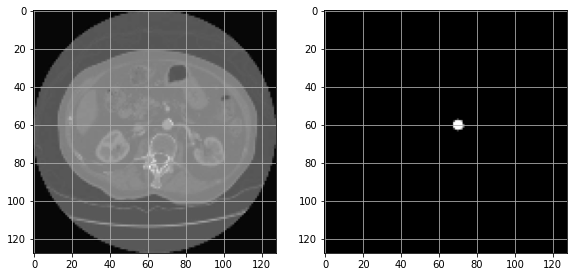

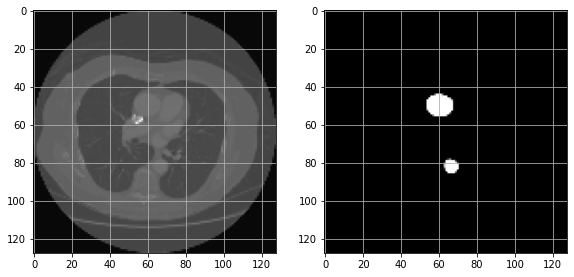

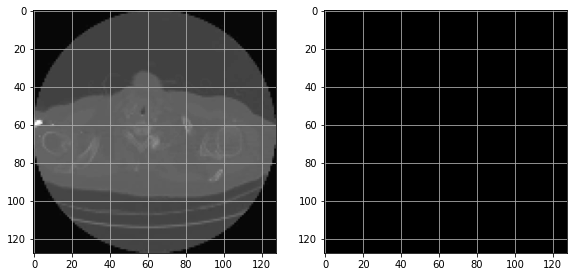

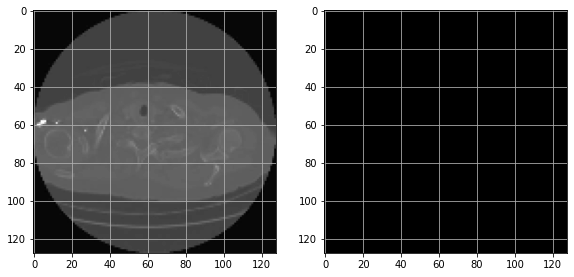

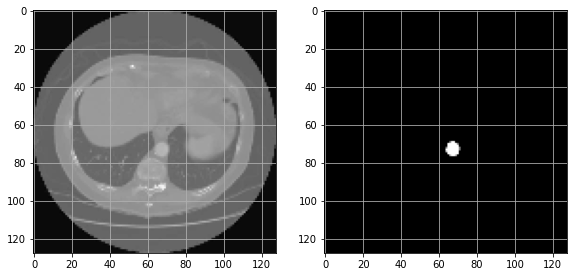

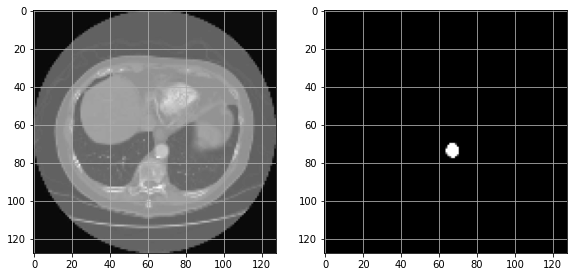

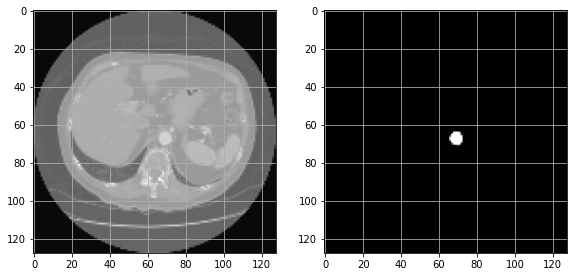

In [ ]:
for i in range(50, 60):
  image_number = i
  # random.randint(0, len(X_train)-1)
  plt.figure(figsize=(20,10))
  plt.subplot(141)
  plt.imshow(X_train[image_number,:,:,0], cmap='gray')
  plt.grid()
  plt.subplot(142)
  plt.imshow(y_train[image_number,:,:,0], cmap='gray')
  plt.grid()
  plt.show
'''
image_number = 103# random.randint(0, len(X_train)-1)
plt.figure(figsize=(20,10))
plt.subplot(143)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.grid()
plt.subplot(144)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.grid()
plt.show
'''

In [ ]:

# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model
  

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

In [82]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=10, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/10
7/7 [==============================] - 255s 35s/step - loss: 0.3652 - accuracy: 0.0000e+00 - val_loss: 0.3824 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 243s 35s/step - loss: 0.3639 - accuracy: 0.0000e+00 - val_loss: 0.3694 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 243s 35s/step - loss: 0.3637 - accuracy: 0.0000e+00 - val_loss: 0.3691 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 247s 35s/step - loss: 0.3635 - accuracy: 0.0000e+00 - val_loss: 0.3712 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 247s 35s/step - loss: 0.3634 - accuracy: 0.0000e+00 - val_loss: 0.3698 - val_accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 246s 35s/step - loss: 0.3634 - accuracy: 0.0000e+00 - val_loss: 0.3697 - val_accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 242s 35s/step - loss: 0.3632 - accuracy: 0.0000e+00 - val_loss

In [83]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Final_Year_Project/my_model_50_epochs') 

In [84]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Final_Year_Project/my_model_50_epochs')

In [ ]:
import os
import shutil

In [ ]:
source = '/content/saved_model/my_model_20_epochs'
destination = '/content/drive/MyDrive/Final_Year_Project/my_model_20_epochs'

In [ ]:
shutil.move(source, destination)

'/content/drive/MyDrive/Final_Year_Project/my_model_20_epochs'

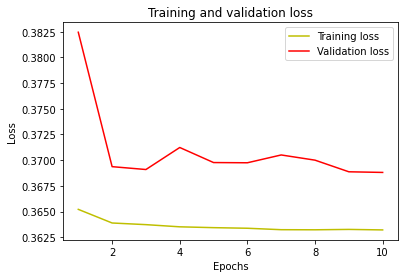

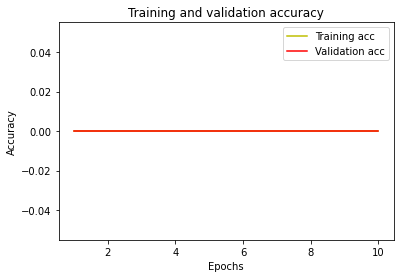

In [85]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

1/1 [==============================] - 19s 19s/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [87]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.49969935


In [ ]:
import random

(1, 128, 128, 1)
1/1 [==============================] - 2s 2s/step
(128, 128)


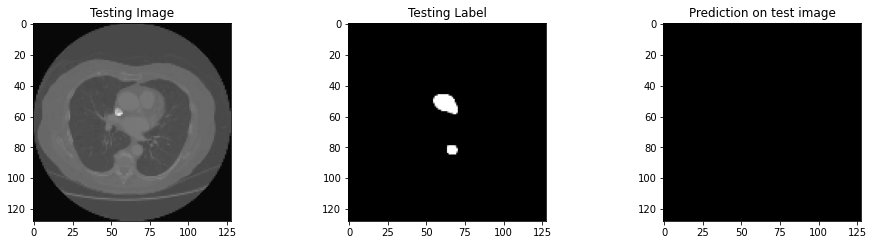

(1, 128, 128, 1)
1/1 [==============================] - 1s 1s/step
(128, 128)


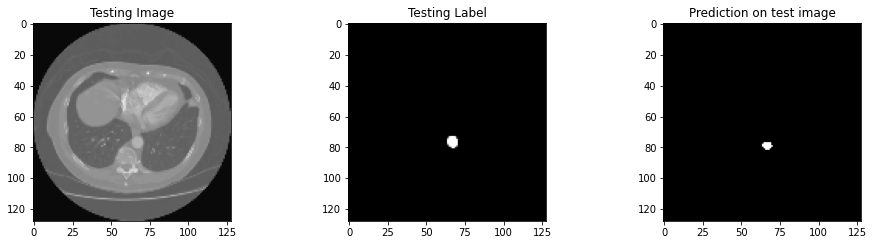

(1, 128, 128, 1)
1/1 [==============================] - 1s 531ms/step
(128, 128)


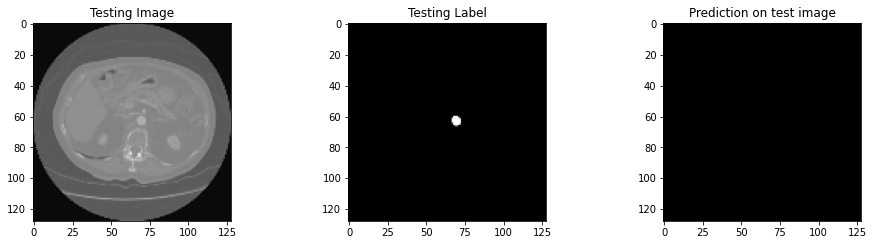

(1, 128, 128, 1)
1/1 [==============================] - 1s 521ms/step
(128, 128)


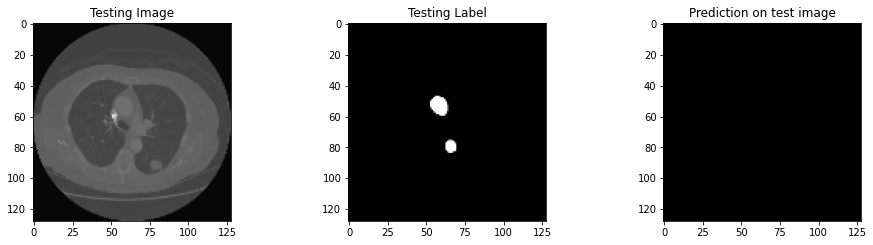

(1, 128, 128, 1)
1/1 [==============================] - 1s 529ms/step
(128, 128)


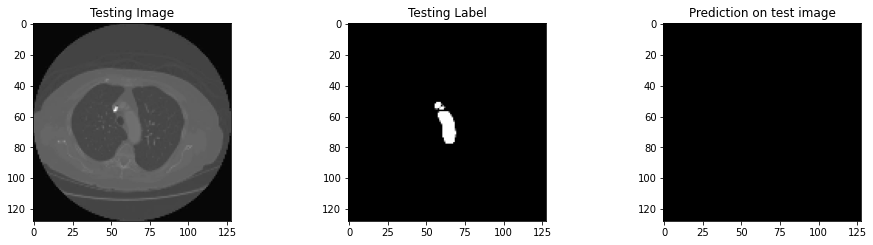

(1, 128, 128, 1)
1/1 [==============================] - 1s 518ms/step
(128, 128)


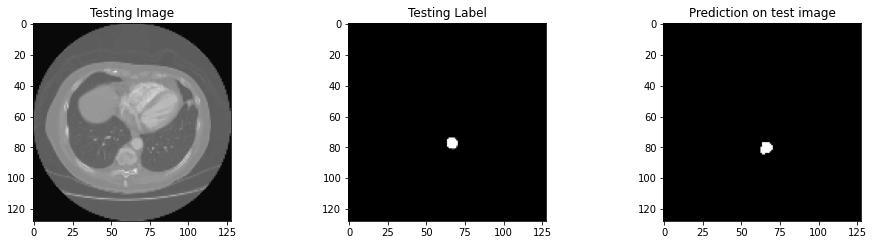

(1, 128, 128, 1)
1/1 [==============================] - 1s 515ms/step
(128, 128)


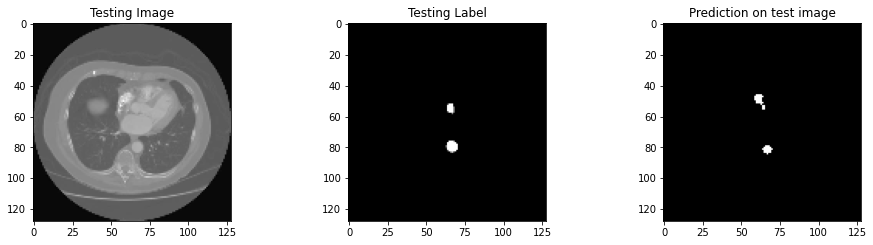

(1, 128, 128, 1)
1/1 [==============================] - 0s 496ms/step
(128, 128)


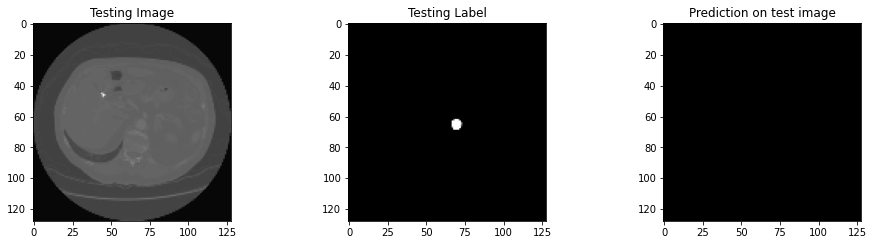

(1, 128, 128, 1)
1/1 [==============================] - 1s 536ms/step
(128, 128)


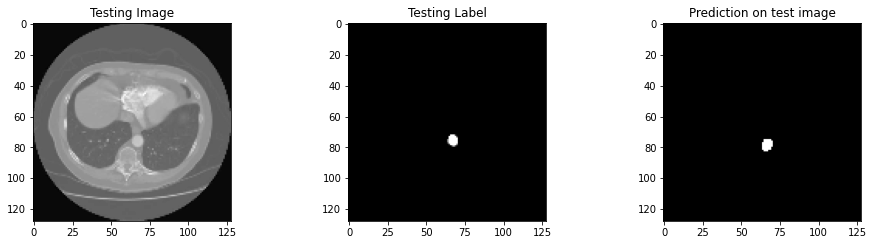

(1, 128, 128, 1)
1/1 [==============================] - 1s 891ms/step
(128, 128)


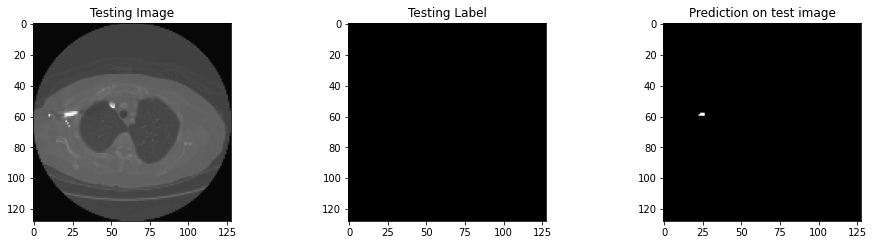

(1, 128, 128, 1)
1/1 [==============================] - 1s 926ms/step
(128, 128)


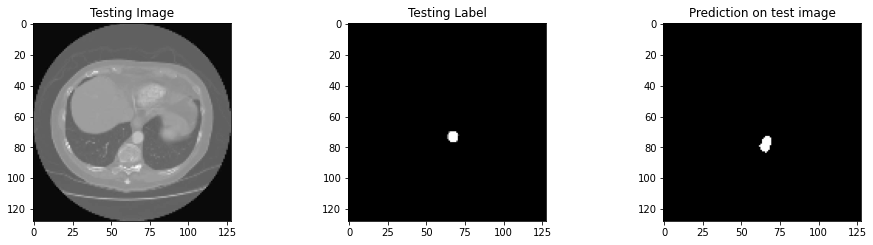

(1, 128, 128, 1)
1/1 [==============================] - 1s 892ms/step
(128, 128)


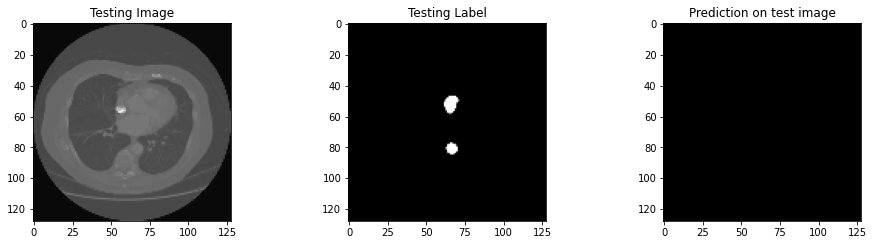

(1, 128, 128, 1)
1/1 [==============================] - 1s 544ms/step
(128, 128)


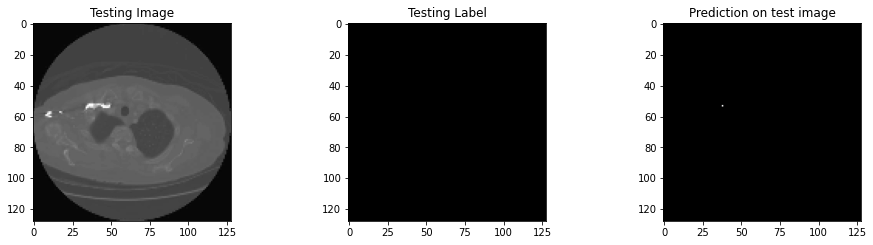

(1, 128, 128, 1)
1/1 [==============================] - 1s 525ms/step
(128, 128)


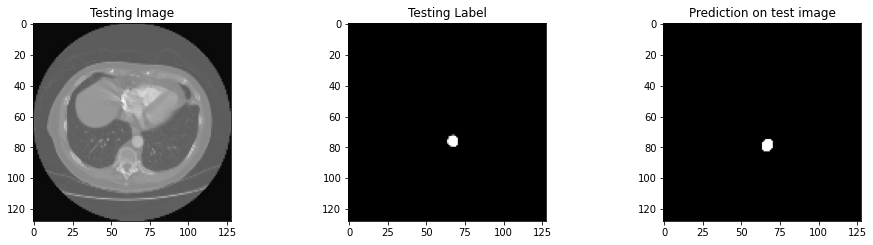

(1, 128, 128, 1)
1/1 [==============================] - 1s 510ms/step
(128, 128)


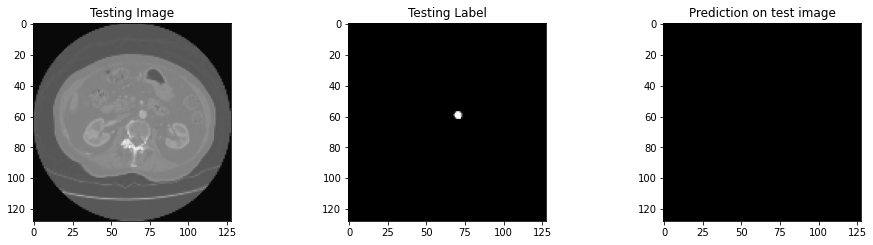

(1, 128, 128, 1)
1/1 [==============================] - 1s 519ms/step
(128, 128)


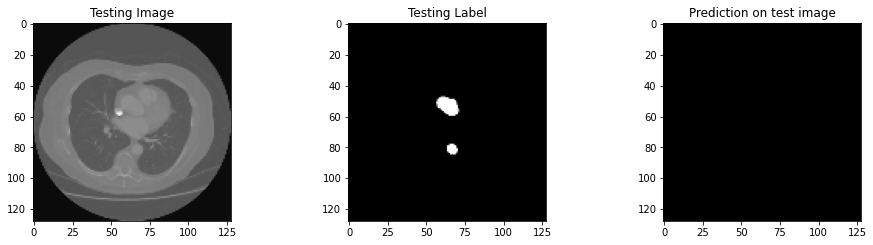

(1, 128, 128, 1)
1/1 [==============================] - 1s 536ms/step
(128, 128)


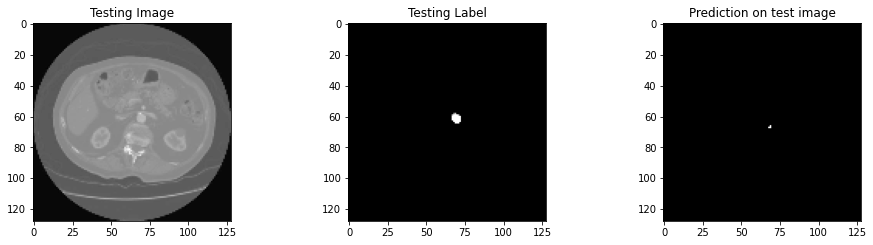

(1, 128, 128, 1)
1/1 [==============================] - 1s 528ms/step
(128, 128)


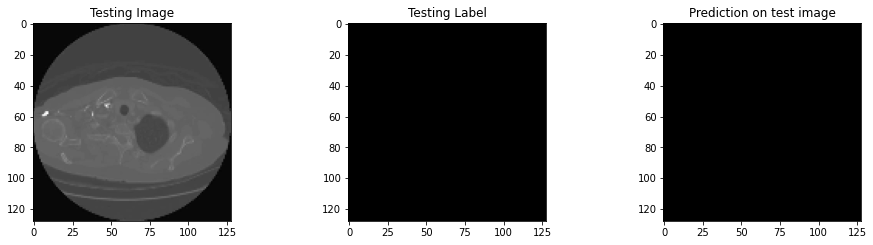

(1, 128, 128, 1)
1/1 [==============================] - 1s 553ms/step
(128, 128)


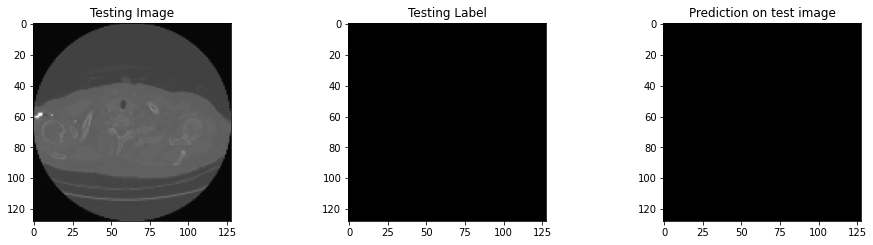

(1, 128, 128, 1)
1/1 [==============================] - 1s 539ms/step
(128, 128)


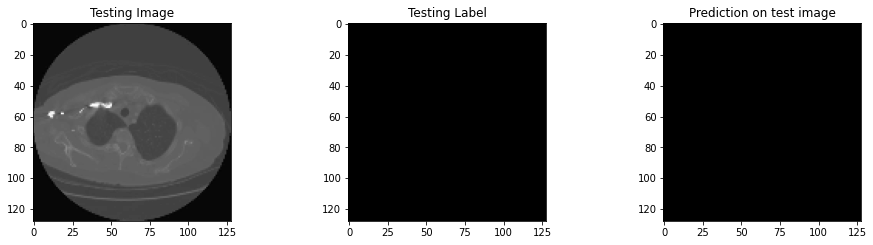

In [88]:
threshold = 0.5
for i in range(0, 20):
  test_img_number = i # random.randint(0, len(X_test)-1)
  test_img = X_train[test_img_number]
  ground_truth=y_train[test_img_number]
  test_img_input=np.expand_dims(test_img, 0)
  print(test_img_input.shape)
  prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
  print(prediction.shape)

  plt.figure(figsize=(16, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img[:,:,0], cmap='gray')
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth[:,:,0], cmap='gray')
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(prediction, cmap='gray')

  plt.show()
     